In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *
colors =   [ '#EE8866', '#77AADD', '#AAAA00', '#EEDD88', '#FFAABB', '#99DDFF', '#44BB99', '#DDDDDD']


## Generate

In [4]:
weather = pd.read_csv('2021_data_12oclock.csv',index_col=0)

#create forecast from 2021 12 o'clock

windspeed = weather['wind_speed']
forecasts = []
for i in range(365): 
    w = windspeed[i*24:i*24+180]
    w_f = synthetic_forecast(w,attract_factor=0.09, noise_strength=0.55, cap_zero=True, random_seed=None)
    forecasts.append(w_f[12:])
forecasts = np.array(forecasts)
#np.save('../../data/weather/2021_wind_forecast.npy',forecasts)

/Users/johanknarreborg/Documents/git.nosync/OWF_OM_OPTIMIZATION/model/data_generation/functions.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  random_walk[0] = predefined_series[0]  # Start random walk at the first value of predefined_series
/Users/johanknarreborg/Documents/git.nosync/OWF_OM_OPTIMIZATION/model/data_generation/functions.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attraction = attract_factor*(0.8 + 2*(np.exp(-i/50))+i*1/168/3) * (predefined_series[i] - random_walk[i - 1])


## Plot

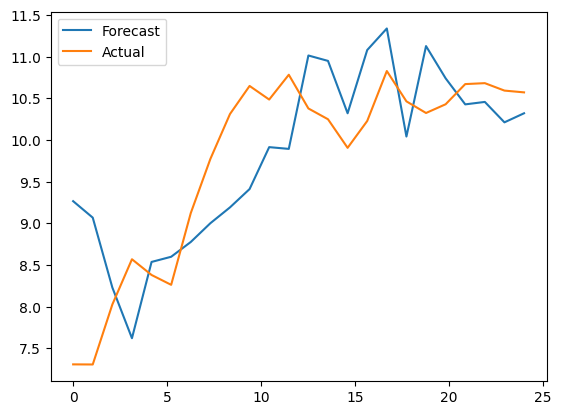

In [12]:
weather = pd.read_csv('../../data/weather/2021_data.csv',index_col=0)
wind_speed = np.array(weather['wind_speed'])
#forecasts = np.load('../../data/weather/2022_wind_forecast.npy')
day = 35
x = np.linspace(0,24,24)
plt.plot(x,forecasts[day,0:24])
plt.plot(x,wind_speed[day*24:day*24+24])
plt.legend(['Forecast','Actual'])